In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
spotify = pd.read_csv('dataset.csv')

In [127]:
spotify.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [128]:
spotify.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [129]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [130]:
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

0         73
1         55
2         57
3         71
4         82
          ..
113995    21
113996    22
113997    22
113998    41
113999    22
Name: popularity, Length: 114000, dtype: int64 skewness is : 0.04640190527012667


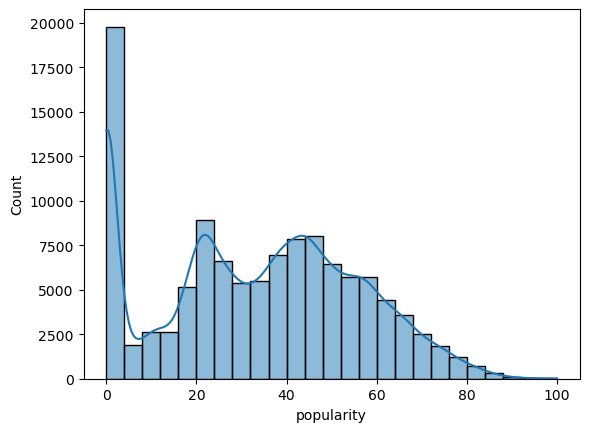

In [131]:
dataset=spotify.copy()
print(spotify['popularity'], 'skewness is :', skew(dataset['popularity']))
sns.histplot(x='popularity', data=dataset, bins=25, kde=True)
plt.show()

In [132]:
combined = ['popularity','duration_ms', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

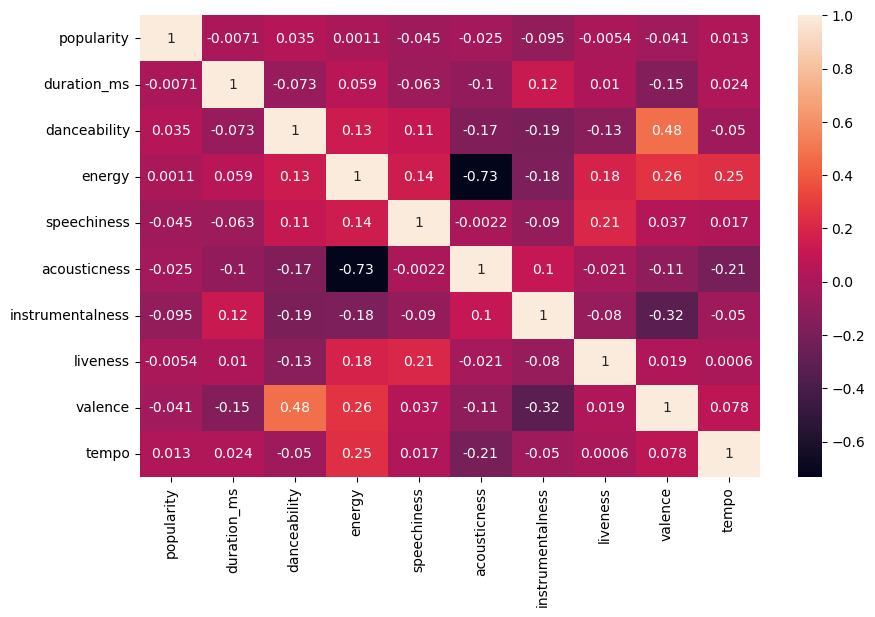

In [133]:
dataset=spotify.copy()
plt.figure(figsize=(10,6))
sns.heatmap(spotify[combined].corr(), annot=True)
plt.show()

In [134]:
# Normalization process
numerical_features = ['duration_ms', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']  # Replace these with your numerical feature column names
target_feature = 'popularity'  

spotify[numerical_features] = (spotify[numerical_features] - spotify[numerical_features].min()) / (spotify[numerical_features].max() - spotify[numerical_features].min())
spotify[target_feature] = (spotify[target_feature] - spotify[target_feature].min()) / (spotify[target_feature].max() - spotify[target_feature].min())

# Converting the data to 64-bit
spotify[numerical_features] = spotify[numerical_features].astype('float64')
spotify[target_feature] = spotify[target_feature].astype('float64')

# Gradient clipping using 0.5 threshold
spotify[numerical_features] = np.clip(spotify[numerical_features], 0, 0.5)

X = spotify[numerical_features].values
y = spotify[target_feature].values

In [135]:
# Ridge Regression function
def ridge_regression(X, y, alpha, learning_rate, num_iterations):
    m, n = X.shape
    weights = np.zeros(n)
    for i in range(num_iterations):
        # Calculate predictions and error
        predictions = np.dot(X, weights)
        error = predictions - y
        
        # Compute gradient and update weights
        gradient = 2/m * (np.dot(X.T, error) + alpha * weights)
        weights -= learning_rate * gradient
        
    return weights



In [136]:
from sklearn.metrics import mean_absolute_error

def k_fold_cross_validation(X, y, alpha, learning_rate, num_iterations, num_folds=5):
    kf = KFold(n_splits=num_folds)
    mse_scores = []
    mae_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Trainining
        weights = ridge_regression(X_train, y_train, alpha, learning_rate, num_iterations)
        
        #  mean squared error 
        predictions = np.dot(X_test, weights)
        mse = np.mean((predictions - y_test) ** 2)
        mse_scores.append(mse)

        #  Mean absolute error 
        mae = mean_absolute_error(y_test, predictions)
        mae_scores.append(mae)

    
    avg_mse = np.mean(mse_scores)
    avg_mae = np.mean(mae_scores)
    return avg_mse, avg_mae


alpha = 10
learning_rate = 0.001
num_iterations = 10000

# Appllying the algortihm
avg_mse, avg_mae = k_fold_cross_validation(X, y, alpha, learning_rate, num_iterations, num_folds=5)

# results
print("Mean squared error:", avg_mse)
print("Mean absolute error:", avg_mae)

Mean squared error: 0.05108363768221352
Mean absolute error: 0.18996849886361447


In [137]:
categorical_features = ['explicit', 'time_signature', 'track_genre', 'key'] 

In [138]:
spotify[categorical_features]

,explicit,time_signature,track_genre,key
0,False,4,acoustic,1
1,False,4,acoustic,1
2,False,4,acoustic,0
3,False,3,acoustic,0
4,False,4,acoustic,2
...,...,...,...,...
113995,False,5,world-music,5
113996,False,4,world-music,0
113997,False,4,world-music,0
113998,False,4,world-music,7


In [139]:
spotify[categorical_features].describe()

,time_signature,key
count,114000.000000,114000.000000
mean,3.904035,5.309140
std,0.432621,3.559987
min,0.000000,0.000000
25%,4.000000,2.000000
50%,4.000000,5.000000
75%,4.000000,8.000000
max,5.000000,11.000000


In [140]:
import pandas as pd
import matplotlib.pyplot as plt

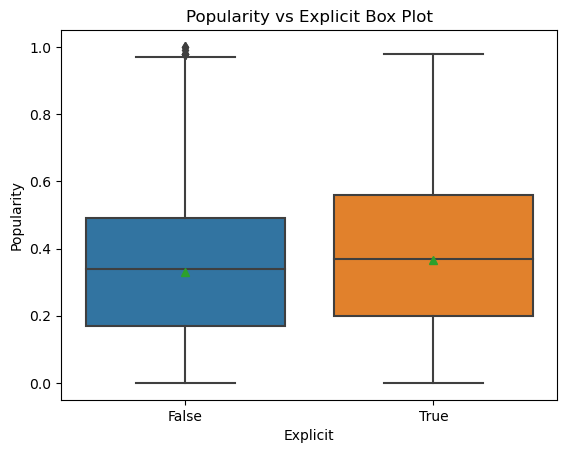

In [141]:
import seaborn as sns

sns.boxplot(
    x = 'explicit',
    y = 'popularity',
    showmeans=True,
    data=spotify
)

plt.title('Popularity vs Explicit Box Plot')
plt.xlabel('Explicit')
plt.ylabel('Popularity')

plt.show()

In [142]:
import pandas as pd
mean_popularity_by_explicit = spotify.groupby('explicit')['popularity'].mean()


print(mean_popularity_by_explicit)

explicit
False    0.329379
True     0.364542
Name: popularity, dtype: float64


In [143]:
explicit_to_popularity_mean_mapping = dict(zip(mean_popularity_by_explicit.index, mean_popularity_by_explicit.values))
spotify['explicit'] = spotify['explicit'].replace(explicit_to_popularity_mean_mapping)

In [144]:
spotify['explicit']

0         0.329379
1         0.329379
2         0.329379
3         0.329379
4         0.329379
            ...   
113995    0.329379
113996    0.329379
113997    0.329379
113998    0.329379
113999    0.329379
Name: explicit, Length: 114000, dtype: float64

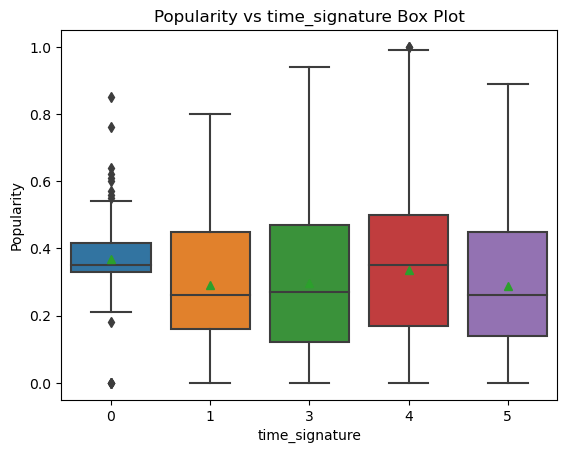

In [145]:
sns.boxplot(
    x = 'time_signature',
    y = 'popularity',
    showmeans=True,
    data=spotify
)

plt.title('Popularity vs time_signature Box Plot')
plt.xlabel('time_signature')
plt.ylabel('Popularity')

plt.show()

In [146]:
mean_popularity_by_time_signature = spotify.groupby('time_signature')['popularity'].mean()

print(mean_popularity_by_time_signature)

time_signature
0    0.369755
1    0.290740
3    0.296924
4    0.336725
5    0.287782
Name: popularity, dtype: float64


In [147]:
time_signature_to_popularity_mean_mapping = dict(zip(mean_popularity_by_time_signature.index, mean_popularity_by_time_signature.values))
spotify['time_signature'] = spotify['time_signature'].replace(time_signature_to_popularity_mean_mapping)

In [148]:
spotify['time_signature']

0         0.336725
1         0.336725
2         0.336725
3         0.296924
4         0.336725
            ...   
113995    0.287782
113996    0.336725
113997    0.336725
113998    0.336725
113999    0.336725
Name: time_signature, Length: 114000, dtype: float64

In [149]:
spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,0.044043,0.329379,0.500000,0.4610,...,-6.746,0,0.148187,0.032329,0.000001,0.3580,0.500000,0.361245,0.336725,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,0.028566,0.329379,0.426396,0.1660,...,-17.235,1,0.079067,0.500000,0.000006,0.1010,0.268342,0.318397,0.336725,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,0.040255,0.329379,0.444670,0.3590,...,-9.734,1,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.336725,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,0.038557,0.329379,0.270051,0.0596,...,-18.515,1,0.037617,0.500000,0.000071,0.1320,0.143719,0.500000,0.296924,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,0.037969,0.329379,0.500000,0.4430,...,-9.681,1,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.336725,acoustic


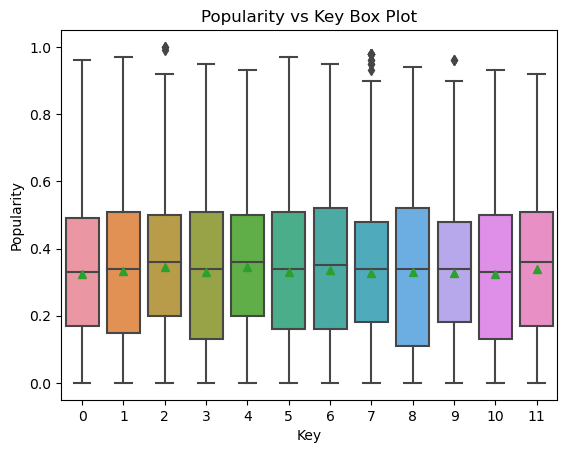

In [150]:

sns.boxplot(
    x = 'key',
    y = 'popularity',
    showmeans=True,
    data=spotify
)

plt.title('Popularity vs Key Box Plot')
plt.xlabel('Key')
plt.ylabel('Popularity')

plt.show()

In [151]:
import pandas as pd

mean_popularity_by_key = spotify.groupby('key')['popularity'].mean()

print(mean_popularity_by_key)

key
0     0.325199
1     0.332002
2     0.343776
3     0.330317
4     0.346437
5     0.329309
6     0.335855
7     0.325796
8     0.329587
9     0.328236
10    0.324614
11    0.338876
Name: popularity, dtype: float64


In [152]:
import pandas as pd

mean_popularity_by_genre = spotify.groupby('track_genre')['popularity'].mean()

print(mean_popularity_by_genre)

track_genre
acoustic       0.42483
afrobeat       0.24399
alt-rock       0.33943
alternative    0.24337
ambient        0.44191
                ...   
techno         0.39042
trance         0.37635
trip-hop       0.34460
turkish        0.40698
world-music    0.41873
Name: popularity, Length: 114, dtype: float64


In [153]:
a = spotify['track_genre'].unique()


In [154]:
print(a)

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

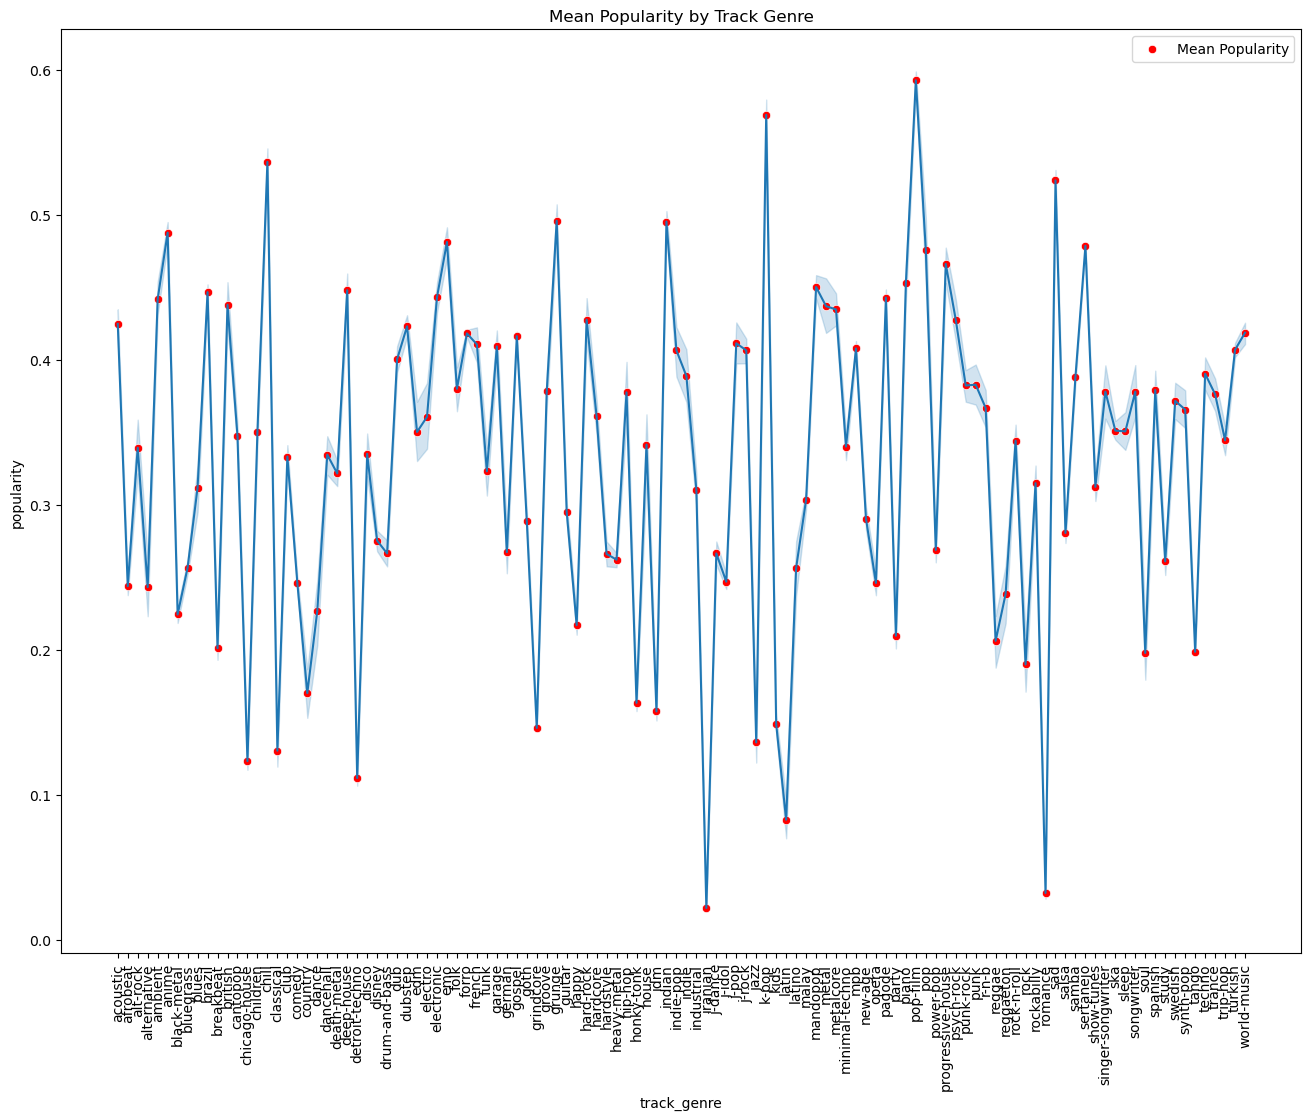

In [161]:
mean_popularity_by_track_genre = spotify.groupby('track_genre')['popularity'].mean()


mean_popularity_df = pd.DataFrame({'track_genre': mean_popularity_by_track_genre.index, 'popularity': mean_popularity_by_track_genre.values})

plt.figure(figsize=(16,12))
sns.lineplot(x='track_genre', y='popularity', data=spotify)
sns.scatterplot(x='track_genre', y='popularity', data=mean_popularity_df, label='Mean Popularity', color='red')
plt.xticks(rotation=90)
plt.title('Mean Popularity by Track Genre')
plt.legend()
plt.show()

In [162]:
mean_popularity_by_genre.describe()

count    114.000000
mean       0.332385
std        0.112948
min        0.022100
25%        0.257840
50%        0.348855
75%        0.411240
max        0.592830
Name: popularity, dtype: float64

In [163]:
genre_to_popularity_mean_mapping = dict(zip(mean_popularity_by_genre.index, mean_popularity_by_genre.values))

In [164]:
spotify['track_genre'] = spotify['track_genre'].replace(genre_to_popularity_mean_mapping)

In [165]:
spotify['track_genre']

0         0.42483
1         0.42483
2         0.42483
3         0.42483
4         0.42483
           ...   
113995    0.41873
113996    0.41873
113997    0.41873
113998    0.41873
113999    0.41873
Name: track_genre, Length: 114000, dtype: float64

In [166]:
spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,0.044043,0.329379,0.500000,0.4610,...,-6.746,0,0.148187,0.032329,0.000001,0.3580,0.500000,0.361245,0.336725,0.42483
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,0.028566,0.329379,0.426396,0.1660,...,-17.235,1,0.079067,0.500000,0.000006,0.1010,0.268342,0.318397,0.336725,0.42483
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,0.040255,0.329379,0.444670,0.3590,...,-9.734,1,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.336725,0.42483
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,0.038557,0.329379,0.270051,0.0596,...,-18.515,1,0.037617,0.500000,0.000071,0.1320,0.143719,0.500000,0.296924,0.42483
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,0.037969,0.329379,0.500000,0.4430,...,-9.681,1,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.336725,0.42483


In [167]:
target_feature

'popularity'

In [168]:
import pandas as pd
import numpy as np

#Normalizationv
categorical_features = ['track_genre', 'explicit', 'time_signature']  # Replace these with your numerical feature column names



# Converting into 64 bit
spotify[categorical_features] = spotify[categorical_features].astype('float64')


# Gradient clipping (thershold = 0.5)
spotify[categorical_features] = np.clip(spotify[categorical_features], 0, 0.5)

combined = ['track_genre', 'explicit', 'time_signature','duration_ms', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
combined_for_corr = ['popularity','track_genre', 'explicit', 'time_signature','duration_ms', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


In [169]:
combined

['track_genre',
 'explicit',
 'time_signature',
 'duration_ms',
 'danceability',
 'energy',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [170]:
spotify[combined]

,track_genre,explicit,time_signature,duration_ms,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.42483,0.329379,0.336725,0.044043,0.500000,0.4610,0.148187,0.032329,0.000001,0.3580,0.500000,0.361245
1,0.42483,0.329379,0.336725,0.028566,0.426396,0.1660,0.079067,0.500000,0.000006,0.1010,0.268342,0.318397
2,0.42483,0.329379,0.336725,0.040255,0.444670,0.3590,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643
3,0.42483,0.329379,0.296924,0.038557,0.270051,0.0596,0.037617,0.500000,0.000071,0.1320,0.143719,0.500000
4,0.42483,0.329379,0.336725,0.037969,0.500000,0.4430,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863
...,...,...,...,...,...,...,...,...,...,...,...,...
113995,0.41873,0.329379,0.287782,0.073511,0.174619,0.2350,0.043731,0.500000,0.500000,0.0863,0.034070,0.500000
113996,0.41873,0.329379,0.336725,0.073511,0.176650,0.1170,0.041554,0.500000,0.500000,0.1050,0.035176,0.350242
113997,0.41873,0.329379,0.336725,0.051833,0.500000,0.3290,0.043523,0.500000,0.000000,0.0839,0.500000,0.500000
113998,0.41873,0.329379,0.336725,0.054206,0.500000,0.5000,0.030777,0.382530,0.000000,0.2700,0.415075,0.500000


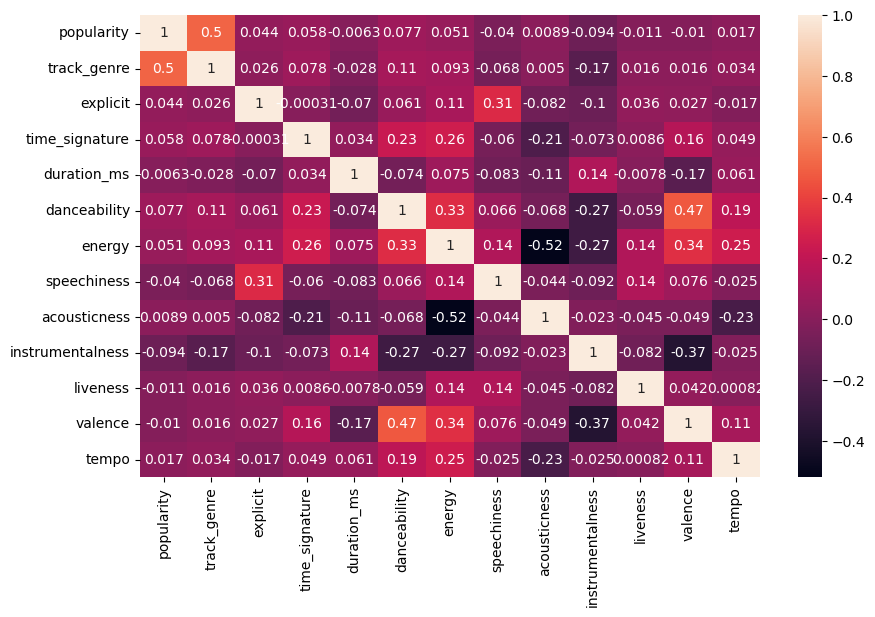

In [171]:
dataset=spotify.copy()
plt.figure(figsize=(10,6))
sns.heatmap(spotify[combined_for_corr].corr(), annot=True)
plt.show()

In [172]:
spotify[target_feature]

0         0.73
1         0.55
2         0.57
3         0.71
4         0.82
          ... 
113995    0.21
113996    0.22
113997    0.22
113998    0.41
113999    0.22
Name: popularity, Length: 114000, dtype: float64

In [173]:
X_combined = spotify[combined].values
y = spotify[target_feature].values

In [174]:
alpha = 0.1
learning_rate = 0.1
num_iterations = 1000

# applying the algortihm
avg_mse, avg_mae = k_fold_cross_validation(X_combined, y, alpha, learning_rate, num_iterations, num_folds=5)

print("Mean squared error:", avg_mse)
print("Mean absolute error:", avg_mae)

Mean squared error: 0.03738796510216581
Mean absolute error: 0.14498254711290487
